# Render Kymographs from all .h5 files

Artur Kaczmarczyk  | akaczmarczyk88@gmail.com   
Single Molecule Imaging Group | D. Rueda lab | Imperial College London | MRC LMS

version: August 11 2021

The script below loads all .h5 files from a folder that contains .h5 files with a kymograph and saves them as .tiff and .png

-------
requirements: tkinter library for opening dialog window; if there is a problem with it, silence the tkinker library and manually add the directory of the folder with .h5 files



In [1]:
# Load the libraries

import os
import numpy as np
import sys
import matplotlib.pyplot as plt

from lumicks import pylake

from tkinter import filedialog        # for opening dialog window
from tkinter import *


## In the pop-up window, select the folder that contains .h5 files with Kymograph files


In [26]:
## ALTERNATIVELY TYPE THE FOLDER DIRECTORY IF THE POP-UP WINDOW DOESN'T WORK
#folder = os.getcwd( )
#filenames = os.listdir(folder)  
#Filenames = []  
#folder_selected =  r'/Users/Artur/OneDrive - Imperial College London/20200913'


root = Tk()
root.withdraw()
folder_selected = filedialog.askdirectory()
root.update()

filenames = os.listdir(folder_selected)          # all files in the chosen folder
Filenames = []                          


# Selection of KYMOGRAPH.H5 files only
for filename in filenames:              
    if filename[-3:] == '.h5' and 'Kymo' in filename:
        
        Filenames.append(filename)
        print(filename)
        
print(type(Filenames))

os.chdir(folder_selected)
os.getcwd()

20200925-143341 M1_TC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 1.h5
20200925-144252 M2_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 2.h5
20200925-145242 M3_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 3.h5
20200925-145858 M3_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 4.h5
20200925-150955 M4_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 5.h5
20200925-151655 M5_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 6.h5
20200925-152527 M6_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 7.h5
20200925-160020 M7_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 9.h5
20200925-160826 M7_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 10.h5
20200925-171143 M7_nonTC_2nM_ssDNA_20nt_26nM_Rad51_TC Kymograph 15.h5
20200925-171833 M7_nonTC_2nM_ssDNA_20nt_26nM_1nM_RRRad51_TC Kymograph 16.h5
20200925-172900 M7_nonTC_2nM_ssDNA_20nt_26nM_1nM_RRRad51_TC Kymograph 19.h5
20200925-174126 M7_nonTC_2nM_ssDNA_20nt_26nM_1nM_RRRad51_TC Kymograph 20.h5
20200925-174222 M7_nonTC_2nM_ssDNA_20nt_26nM_1nM_RRRad51_TC Kymograph 21.h5
2020092

'/Volumes/ELEMENTS/C-TRAP data 2020/20200925'

## Extract kymographs from all files in the folder and save them as .TIFF

Kymo I.D. = ['1']
Imaging time = 318.95 s
Kymo I.D. = ['2']
Imaging time = 254.67 s
Kymo I.D. = ['3']
Imaging time = 279.73 s
Kymo I.D. = ['4']
Imaging time = 317.83 s
Kymo I.D. = ['5']
Imaging time = 402.9 s
Kymo I.D. = ['6']
Imaging time = 192.87 s
Kymo I.D. = ['7']
Imaging time = 229.81 s
Kymo I.D. = ['9']
Imaging time = 537.89 s
Kymo I.D. = ['10']
Imaging time = 248.5 s
Kymo I.D. = ['15']
Imaging time = 588.57 s
Kymo I.D. = ['16']
Imaging time = 233.45 s
Kymo I.D. = ['19']
Imaging time = 274.36 s
Kymo I.D. = ['20']
Imaging time = 100.24 s
Kymo I.D. = ['21']
Imaging time = 384.54 s
Kymo I.D. = ['22']
Imaging time = 109.06 s


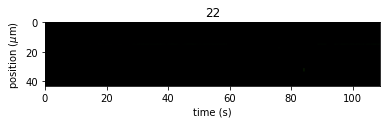

In [27]:
for i in range(len(Filenames)):
   
    name = str(Filenames[i])
    file = pylake.File(name)
    
    print("Kymo I.D. = " + str(list(file.kymos)))   
    #print(file)                                   # textual representation of the contents of a file

    kymos_names = list(file.kymos)                 # reference to Kymo I.D 
    kymos = file.kymos[kymos_names[0]]
                              
    #print("Start timestamp = " + str(kymos.start) + " ns")
    #print("End timestamp = " + str(kymos.stop) + " ns")
    time = round((kymos.stop - kymos.start) /1000000000,2)
    print("Imaging time = " + str(time) + " s")
    
    index = kymos_names[0]                        #first index from the list of kymographs within one file    
    #name = 'Kymo_' + index + '.tiff'
    name2 = name[:-3] + '.tiff'

    kymos.save_tiff(str(name2))
    kymos.plot_rgb(vmax=0.1)    
    plt.savefig(name[:-3] + '.png', dpi=300, bbox_inches='tight')
